<a href="https://colab.research.google.com/github/HeberPareja/IA-MiniRobots_2024-2/blob/master/EjercicioN6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Ejercicio N° 6.1
*   Universidad Nacional de Colombia
*   Inteligencia Artificial y Mini-Robots 2024-2
*   Heber Alexander Pareja Romero
*   haparejar@unal.edu.co

# **<> Introducción**

Este código utiliza una red neuronal para aproximar la función seno de números aleatorios generados
entre -10 y 10. Se entrena un modelo de red neuronal que predice el valor del seno para un conjunto de datos aleatorios, utilizando la librería TensorFlow y Keras. Primero, se crea y se grafica el dataset, luego se entrena el modelo y se evalúa con nuevos valores aleatorios, comparando las predicciones con los resultados reales obtenidos mediante la función matemática seno.

# **<> Desarrollo**

Se importan las librerías necesarias

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math
import matplotlib.pyplot as plt

Se generan 1000 muestras de valores aleatorios entre -10 y 10, luego se calcula el seno de cada uno y se grafican. Estos valores conformarán el conjunto de datos con el que se entrenará el modelo.

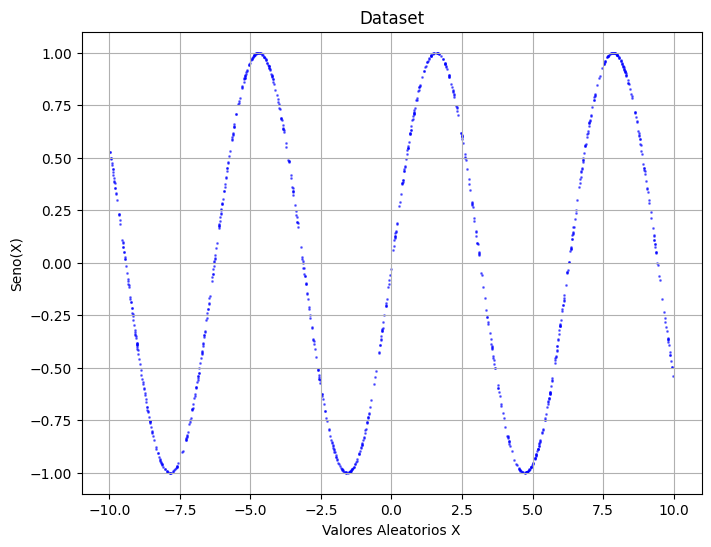

In [ ]:
# Generación de dataset
n_samples = 1000
X = np.random.uniform(-10, 10, n_samples)  # 1000 números aleatorios entre -10 y 10
y = np.sin(X)  # Calculamos el seno de cada número

# Graficar el dataset (X vs sin(X))
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', s=1, alpha=0.5)
plt.title("Dataset")
plt.xlabel("Valores Aleatorios X")
plt.ylabel("Seno(X)")
plt.grid(True)
plt.show()

Se normalizan los datos de entrada y salida, luego se define y entrena una red neuronal para aproximar la función seno. La red consta de tres capas ocultas con 128, 64 y 32 neuronas, respectivamente, y una capa de salida con una sola neurona. Se utiliza el optimizador Adam y el error cuadrático medio como función de pérdida. Finalmente, el modelo se entrena durante 200 épocas con lotes de 64 muestras.

In [ ]:
# Normalización de las entradas y las salidas
X_mean = np.mean(X)
X_std = np.std(X)
y_mean = np.mean(y)
y_std = np.std(y)

X_normalized = (X - X_mean) / X_std
y_normalized = (y - y_mean) / y_std

# Definir el modelo de red neuronal más complejo
model = Sequential([
    Dense(128, input_dim=1, activation='relu'),  # Capa oculta con 128 neuronas
    Dense(64, activation='relu'),  # Capa oculta con 64 neuronas
    Dense(32, activation='relu'),  # Capa oculta con 32 neuronas
    Dense(1)  # Capa de salida con una sola neurona (para el valor del seno)
])

model.compile(optimizer='adam', loss='mean_squared_error') # Compilar el modelo

model.fit(X_normalized, y_normalized, epochs=200, batch_size=64, verbose=0) # Entrenar el modelo con 200 épocas

El código evalúa el rendimiento del modelo generando 10 valores aleatorios entre -10 y 10, normalizándolos y obteniendo sus predicciones. Luego, las predicciones se desnormalizan para devolverlas a su escala original y se comparan con los valores reales de la función seno. Finalmente, se imprimen los resultados de cada valor, mostrando la predicción del modelo junto con el valor real del seno.

In [ ]:
# Evaluación con 10 ejemplos
test_values = np.random.uniform(-10, 10, 10)  # 10 nuevos valores aleatorios
test_values_normalized = (test_values - X_mean) / X_std  # Normalización de los valores

predictions = model.predict(test_values_normalized) # Predicciones del modelo

predictions_denormalized = predictions * y_std + y_mean # Convertir las predicciones de vuelta a su escala original

actual_sine_values = np.sin(test_values) # Comparar con la función math.sin

# Mostrar resultados
for i in range(10):
    print(f"Valor: {test_values[i]:.3f} - Seno (predicho): {predictions_denormalized[i][0]:.3f} - Seno (real): {actual_sine_values[i]:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Valor: -3.211 - Seno (predicho): 0.077 - Seno (real): 0.070
Valor: -7.288 - Seno (predicho): -0.850 - Seno (real): -0.844
Valor: 1.686 - Seno (predicho): 1.005 - Seno (real): 0.993
Valor: 1.130 - Seno (predicho): 0.915 - Seno (real): 0.904
Valor: 1.957 - Seno (predicho): 0.935 - Seno (real): 0.926
Valor: 7.891 - Seno (predicho): 0.999 - Seno (real): 0.999
Valor: 5.556 - Seno (predicho): -0.663 - Seno (real): -0.665
Valor: -4.497 - Seno (predicho): 0.979 - Seno (real): 0.977
Valor: 5.673 - Seno (predicho): -0.571 - Seno (real): -0.573
Valor: -3.546 - Seno (predicho): 0.396 - Seno (real): 0.393


# **<> Conclusiones**

Esto demuestra que la red neuronal ha logrado aprender correctamente el comportamiento de la función seno a partir del conjunto de datos de entrenamiento. La baja diferencia entre las predicciones y los valores reales indica que el modelo es capaz de generalizar bien dentro del rango de valores considerados.